In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import pingouin as pg

In [2]:
features=pd.read_csv(r"C:\Users\Workspace\Downloads\ml walmart\features.csv")
stores=pd.read_csv(r"C:\Users\Workspace\Downloads\ml walmart\stores.csv")
train=pd.read_csv(r"C:\Users\Workspace\Downloads\ml walmart\train.csv")
test=pd.read_csv(r"C:\Users\Workspace\Downloads\ml walmart\test.csv")
sampleSubmission=pd.read_csv(r"C:\Users\Workspace\Downloads\ml walmart\sampleSubmission.csv")

In [3]:
pd.DataFrame(features.dtypes, columns=['Type']).T

Store    Date Temperature Fuel_Price MarkDown1 MarkDown2 MarkDown3  \
Type  int64  object     float64    float64   float64   float64   float64   

     MarkDown4 MarkDown5      CPI Unemployment IsHoliday  
Type   float64   float64  float64      float64      bool

In [4]:
pd.DataFrame(stores.dtypes, columns=['Type']).T

Store    Type   Size
Type  int64  object  int64

In [5]:
pd.DataFrame(train.dtypes, columns=['Type']).T

Store   Dept    Date Weekly_Sales IsHoliday
Type  int64  int64  object      float64      bool

In [6]:
pd.DataFrame(test.dtypes, columns=['Type']).T

Store   Dept    Date IsHoliday
Type  int64  int64  object      bool

In [7]:
print(features.shape)
print(stores.shape)
print(train.shape)
print(test.shape)
print("The ratio of train data: test data is ", 
      (round(train.shape[0]*100/(train.shape[0]+test.shape[0])),100-round(train.shape[0]*100/(train.shape[0]+test.shape[0]))))

(8190, 12)
(45, 3)
(421570, 5)
(115064, 4)
The ratio of train data: test data is  (79, 21)


In [8]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [9]:
print("The number of rows and columns is: ",(feature_store.shape))
print("exist",(len(feature_store.Store.unique())), 'unique stores')

The number of rows and columns is:  (8190, 14)
exist 45 unique stores


In [10]:
train_df = train.merge(feature_store, how='inner', 
                       on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [11]:
print("The number of rows and columns is: ",(train_df.shape))

The number of rows and columns is:  (421570, 16)


In [12]:
test_df = test.merge(feature_store, how='inner', 
                     on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [13]:
print("The number of rows and columns is: ",(test_df.shape))

The number of rows and columns is:  (115064, 15)


In [14]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

print(train_df["Date"].dtypes)
print(test_df["Date"].dtypes)

datetime64[ns]
datetime64[ns]


In [15]:
train_df['Day'] = train_df['Date'].dt.day
train_df['Week'] = train_df['Date'].dt.week
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year


test_df['Day'] = test_df['Date'].dt.day
test_df['Week'] = test_df['Date'].dt.week
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year

print("The number of rows and columns is: ",(train_df.shape))
print("The number of rows and columns is: ",(test_df.shape))

The number of rows and columns is:  (421570, 20)
The number of rows and columns is:  (115064, 19)


In [16]:
train_df.head(1)

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05       24924.5      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  Day  Week  Month  Year  
0         8.106    A  151315    5     5      2  2010

In [17]:
test_df.head(1)

Store  Dept       Date  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0      1     1 2012-11-02      False        55.32       3.386    6766.44   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment Type  \
0     5147.7      50.82     3639.9    2737.42  223.462779         6.573    A   

     Size  Day  Week  Month  Year  
0  151315    2    44     11  2012

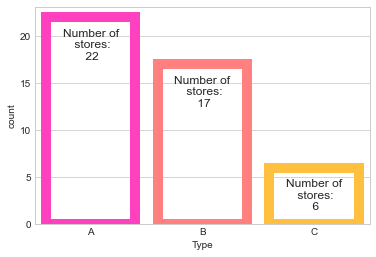

In [18]:
ax = sns.countplot(stores.Type ,facecolor=(0,0,0,0),linewidth=10,
                   edgecolor=sns.color_palette("spring", 3))
for p in ax.patches:
    ax.annotate(f'Number of\n stores:\n {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()-4),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=12);

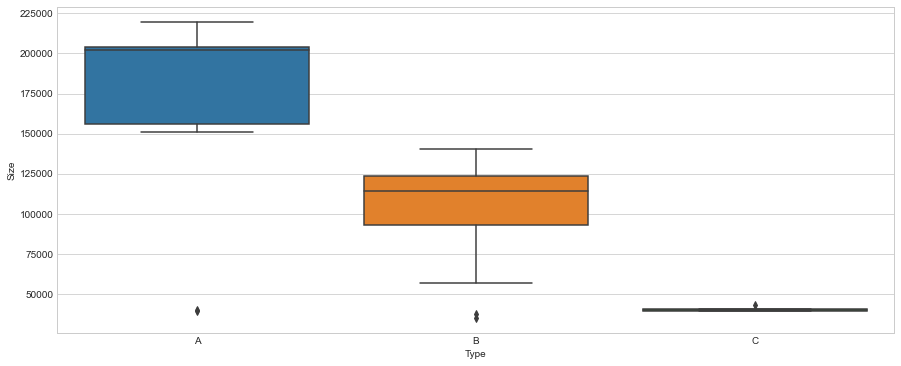

In [19]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Type', y='Size', data=store_type);

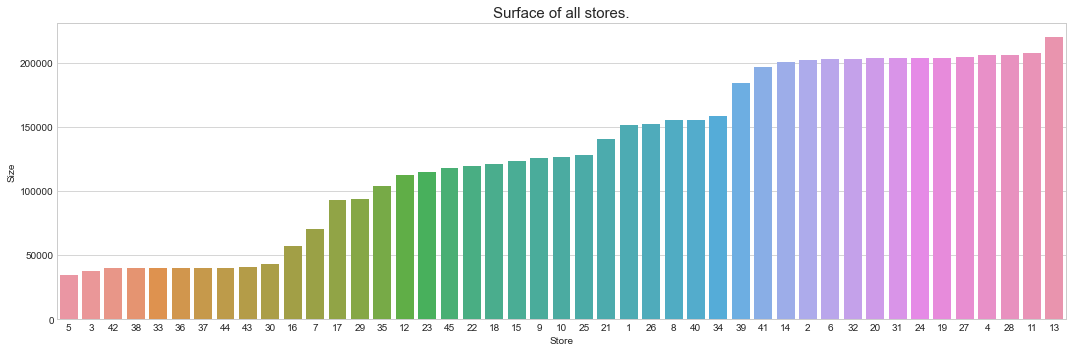

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Surface of all stores.',fontsize=15)
plt.tight_layout();

Type vs Weekly_Sales


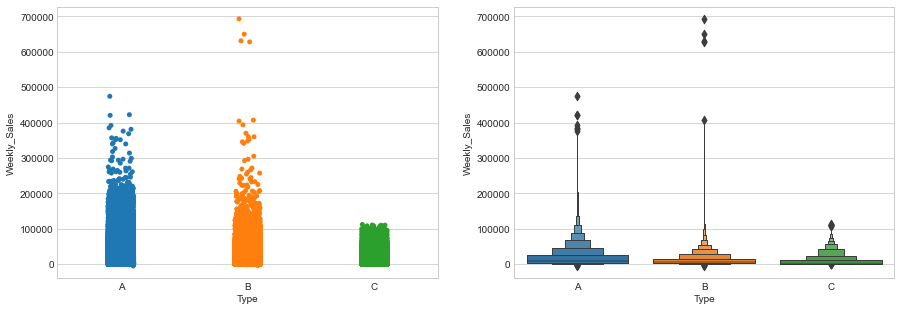

In [21]:
print('Type vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_df['Weekly_Sales'],x=train_df['Type'])
plt.subplot(1,2,2)
sns.boxenplot(y=train_df['Weekly_Sales'],x=train_df['Type']);

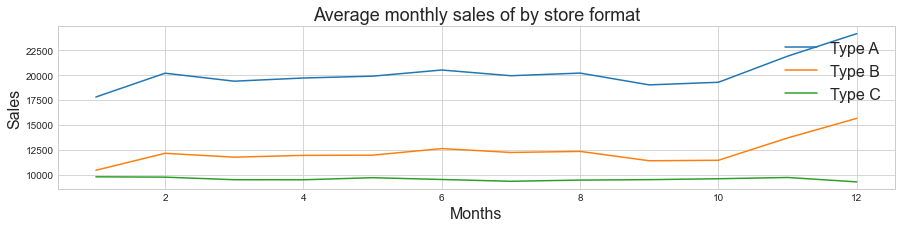

In [22]:
plt.figure(figsize=(15,3))
train_df[train_df['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average monthly sales of by store format', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

In [23]:
print("Correlation of the average monthly sales of formats A and C")
display(pg.corr(train_df['Type']=='A', train_df['Type']=='C', method='pearson'))
print("--------------------------------------------------------")
print("Correlation of the average monthly sales of formats B and C")
display(pg.corr(train_df['Type']=='B', train_df['Type']=='C', method='pearson'))

Correlation of the average monthly sales of formats A and C


n         r           CI95%  p-val BF10  power
pearson  421570 -0.342812  [-0.35, -0.34]    0.0  inf    1.0

--------------------------------------------------------
Correlation of the average monthly sales of formats B and C


n         r           CI95%  p-val BF10  power
pearson  421570 -0.266848  [-0.27, -0.26]    0.0  inf    1.0

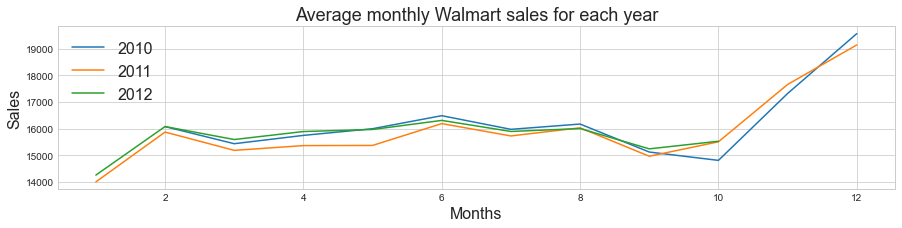

In [24]:
for df in [train_df,test_df]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_df[train_df['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Average monthly Walmart sales for each year', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Months', fontsize=16);

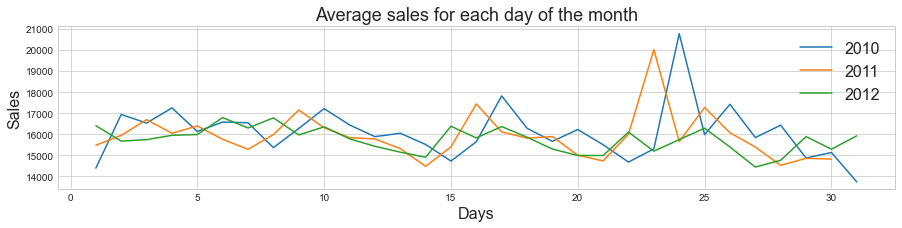

In [25]:
for df in [train_df,test_df]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,3))
train_df[train_df['Year']==2010].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2011].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2012].groupby('Day').mean()['Weekly_Sales'].plot()
plt.title('Average sales for each day of the month', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Days', fontsize=16);

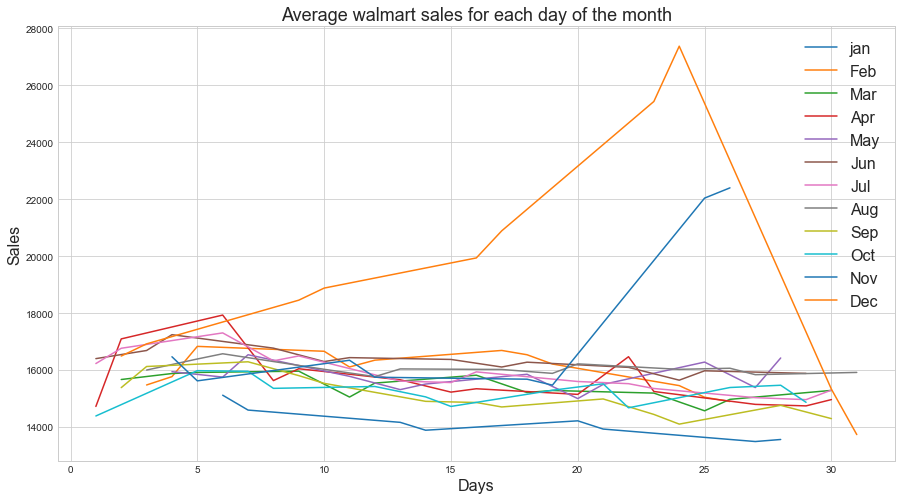

In [26]:
for df in [train_df,test_df]:
    df['Week'] = df['Date'].dt.week
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

plt.figure(figsize=(15,8))
train_df[train_df['Month']==1].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==2].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==3].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==4].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==5].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==6].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==7].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==8].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==9].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==10].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==11].groupby('Day').mean()['Weekly_Sales'].plot()
train_df[train_df['Month']==12].groupby('Day').mean()['Weekly_Sales'].plot()
plt.title('Average walmart sales for each day of the month', fontsize=18)
plt.legend(['jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Days', fontsize=16);

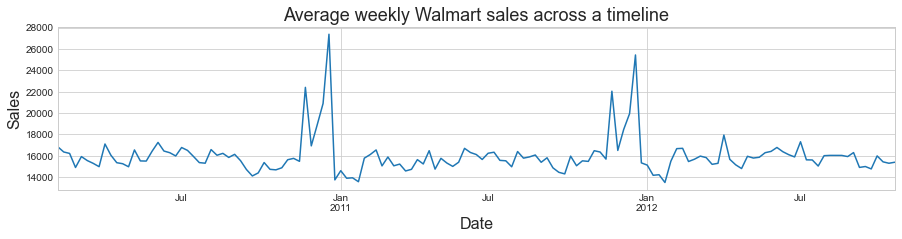

In [27]:
plt.figure(figsize=(15,3))
train_df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Walmart sales across a timeline', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

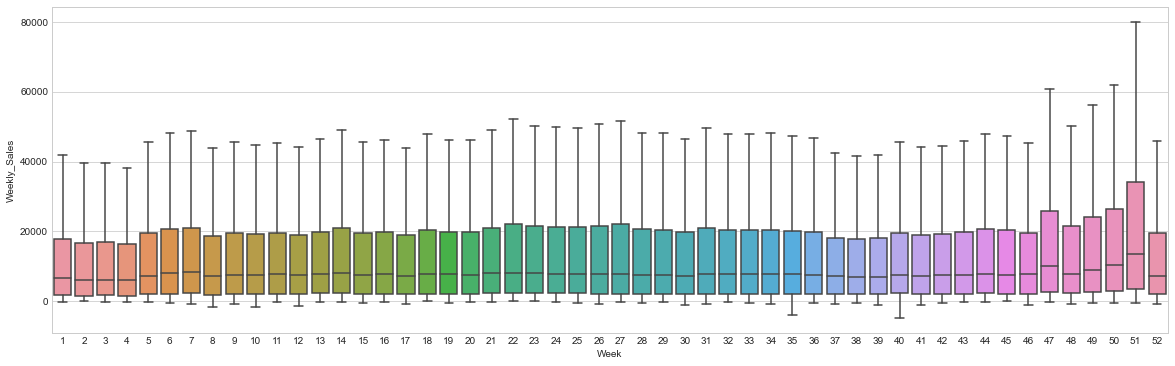

In [28]:
data = pd.concat([train_df['Week'], train_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)

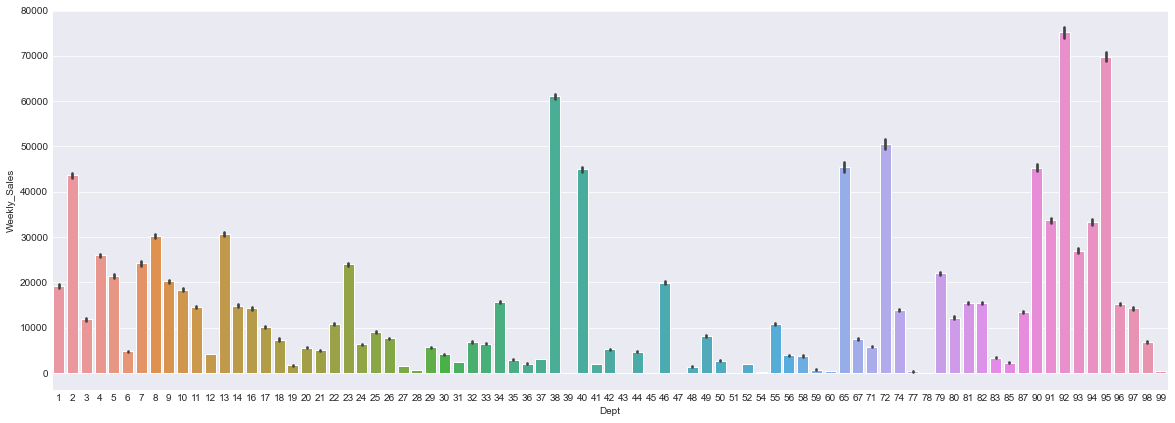

In [29]:
plt.figure (figsize = (20,7))
sns.set_style('darkgrid')
sns.barplot ( data = train_df, x = 'Dept', y =  'Weekly_Sales');


# # My Part

In [30]:
df_weeks = train_df.groupby('Week').sum()

In [ ]:
here we will observe the weekly sales vs 

In [31]:
weekly_sales = train_df.groupby(['Year','Week'], as_index = False).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train_df.loc[train_df['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train_df.loc[train_df['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train_df.loc[train_df['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})

In [32]:
fig7 = go.Figure()
fig7.add_trace(go.Scatter( x = weekly_sales2010['Weekly_Sales']['mean'].index, y = weekly_sales2010['Weekly_Sales']['mean'], name = 'Media Ventas 2010', mode = 'lines') )
fig7.add_trace(go.Scatter( x = weekly_sales2011['Weekly_Sales']['mean'].index, y = weekly_sales2011['Weekly_Sales']['mean'], name = 'Media Ventas 2011', mode = 'lines') )
fig7.add_trace(go.Scatter( x = weekly_sales2012['Weekly_Sales']['mean'].index, y = weekly_sales2012['Weekly_Sales']['mean'], name = 'Media Ventas 2012', mode = 'lines') )
fig7.update_layout(title = 'Sales 2010, 2011, 2012', xaxis_title = 'week')

# Analyzing the resulting graph, a strong rise in sales is observed in week 5 and in Sales1 (MarkDown1). 
There is a strong 99% correlation between the first five weeks of the year and the sales strategy with the 
Markdown1 markdown, therefore, it is assumed that it could be a commercial 
strategy focused on overcoming the January slope.

In [155]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig1.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly sales', mode = 'lines') )
fig1.update_layout(title = 'Sales vs Markdown1', xaxis_title = 'Weeks')

In [156]:
df_weeks_Markdown1 = df_weeks.iloc[[0,1,2,3,4]]
print("Correlation between Markdow1 and the first five weeks of the year")
display(pg.corr(df_weeks_Markdown1['Weekly_Sales'], df_weeks_Markdown1['MarkDown1'], method='pearson'))

Correlation between Markdow1 and the first five weeks of the year


n         r        CI95%     p-val    BF10     power
pearson  5  0.999226  [0.99, 1.0]  0.000026  72.366  0.999927

# Analyzing the behavior of the Sales2 (Markdown2), a strategy can be seen for specific dates
(weeks from 01 to 08, week 14, week 45 and week 52). The correlation is moderately negative at -0.44.
Therefore, as sales increase, sales decrease, this could be due to the fact that these are basic products where 
the units sold are the same regardless of the discount
and when applying the sales there is less turnover.

In [157]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDownw2', mode = 'lines') )
fig2.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly sales', mode = 'lines') )
fig2.update_layout(title = 'Sales vs Markdown2', xaxis_title = 'Weeks')

In [158]:
df_weeks_Markdown2 = df_weeks.iloc[[0,1,2,3,4,5,6,7,8,13,44,51]]
print("Correlation between Markdown2 promotion weeks and weekly sales")
display(pg.corr(df_weeks_Markdown2['Weekly_Sales'], df_weeks_Markdown2['MarkDown2'], method='pearson'))

Correlation between Markdown2 promotion weeks and weekly sales


n         r          CI95%     p-val   BF10    power
pearson  12 -0.442863  [-0.81, 0.18]  0.149355  0.907  0.31534

# It would be a specific promotion for week 47 of Thanksgiving (November 25) with a positive correlation of 99%
2.2.4 Analysis of 52 weeks sales vs Sales4


In [159]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig3.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'weekly sales', mode = 'lines') )
fig3.update_layout(title = 'Sales vs Markdown3', xaxis_title = 'Weeks')

In [160]:
df_weeks_Markdown3 = df_weeks.iloc[[45,46,47]]
print("Correlation between Markdown3 promotion weeks and weekly sales ")
display(pg.corr(df_weeks_Markdown3['Weekly_Sales'], df_weeks_Markdown3['MarkDown3'], method='pearson'))

Correlation between Markdown3 promotion weeks and weekly sales 


n         r        CI95%     p-val   BF10  power
pearson  3  0.992206  [-1.0, 1.0]  0.079532  1.663    NaN

# It is a campaign focused on the first four weeks of the year, week 9 and week 31 with a strong positive correlation of 82%

In [161]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig4.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly sales', mode = 'lines') )
fig4.update_layout(title = 'Sales vs Markdown4', xaxis_title = 'Week')

In [162]:
df_weeks_Markdown4 = df_weeks.iloc[[0,1,2,3,4,8,30]]
print("Correlation between Markdown 4 promotion weeks and weekly sales")
display(pg.corr(df_weeks_Markdown4['Weekly_Sales'], df_weeks_Markdown4['MarkDown4'], method='pearson'))

Correlation between Markdown 4 promotion weeks and weekly sales


n         r         CI95%     p-val   BF10     power
pearson  7  0.822068  [0.18, 0.97]  0.023248  3.895  0.690314

# Analysis of 52 weeks sales vs Sales5 There is an increase in the Markdown5 sales model
in week 48, this being the week after Thanksgiving and its purpose could be to eliminate possible surpluses 
of those products focused on November 25 or to try to avoid a drop in sales in the week after the holiday. 
The correlation is moderately negative at -54% suggesting that stock is being
eliminated in possible perishable products.

In [163]:
fig5 = go.Figure()
fig5.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )
fig5.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly sales', mode = 'lines') )
fig5.update_layout(title = 'Sales vs Markdown5', xaxis_title = 'Semanas')

In [164]:
df_weeks_Markdown5 = df_weeks.iloc[[45,46,47]]
print("Correlation between promotion weeks 46,47 and 48 Markdown5 and weekly sales ")
display(pg.corr(df_weeks_Markdown5['Weekly_Sales'], df_weeks_Markdown5['MarkDown5'], method='pearson'))

Correlation between promotion weeks 46,47 and 48 Markdown5 and weekly sales 


n         r        CI95%     p-val  BF10  power
pearson  3 -0.539441  [-1.0, 1.0]  0.637271  0.76    NaN

# The success in the different campaigns allows to obtain a linearity in the sales throughout the year.
However, there are specific periods where there is a significant decrease in sales, these would be the first four 
weeks of the 
year and the week before and after Thanksgiving.

In [165]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig6.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig6.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig6.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig6.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )
fig6.add_trace(go.Sca1tter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines+markers') )
fig6.update_layout(title = 'Sales vs Total Markdown', xaxis_title = 'Semanas')

# 2.3 Analysis of different variables
2.3.1 Sales analysis if the week is a holiday
When the week is festive, there is an increase in weekly sales with considerable dispersion of values compared to a 
regular week.


IsHoliday vs Weekly_Sales


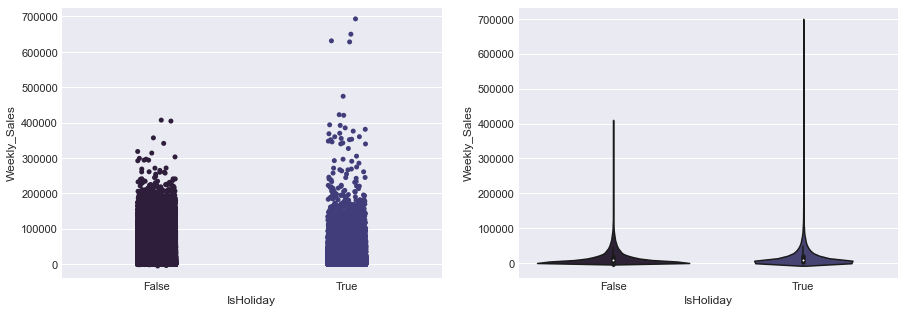

In [166]:
print('IsHoliday vs Weekly_Sales')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday'])
plt.subplot(1,2,2)
sns.violinplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday']);

# 2.3.2 Contrast between Weekly Sales and room temperature
It is observed that sales remain stable regardless of the outside temperature as a general rule.


In [167]:
#Convert the temperature to degrees centigrade for a better interpretation.
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8 )
train_df['Temperature'] = (train_df['Temperature']-32.)/1.8
test_df['Temperature'] = (test_df['Temperature']-32.)/1.8

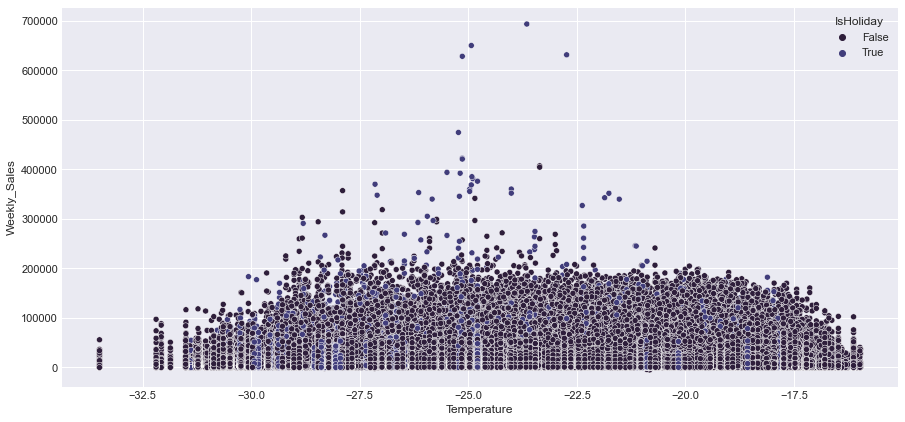

In [168]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Temperature', y =  'Weekly_Sales', hue = 'IsHoliday');

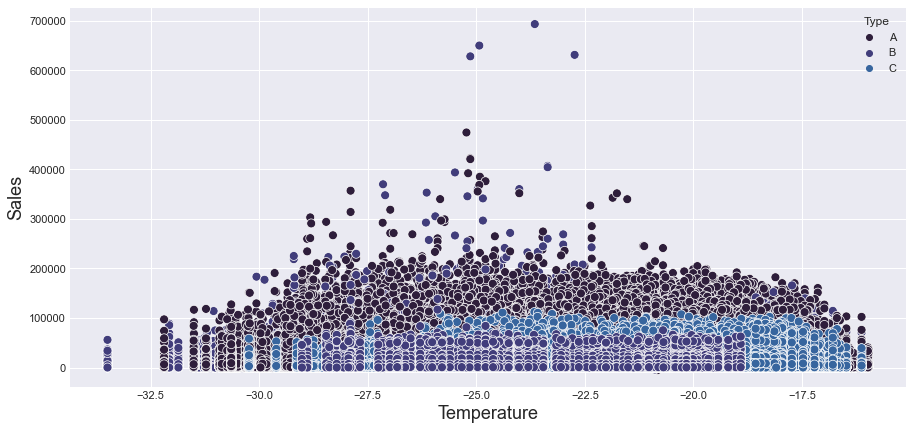

In [169]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=train_df.Temperature, y=train_df.Weekly_Sales, hue=train_df.Type, s=80);

#plt.xticks( fontsize=16)
#plt.yticks( fontsize=16)
sns.set_style('darkgrid')
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Sales', fontsize=18);

# 2.3.3 Contrast between Weekly Sales and fuel price
It is observed that sales remain stable as long as the gallon of gasoline does not exceed 4.25 USD

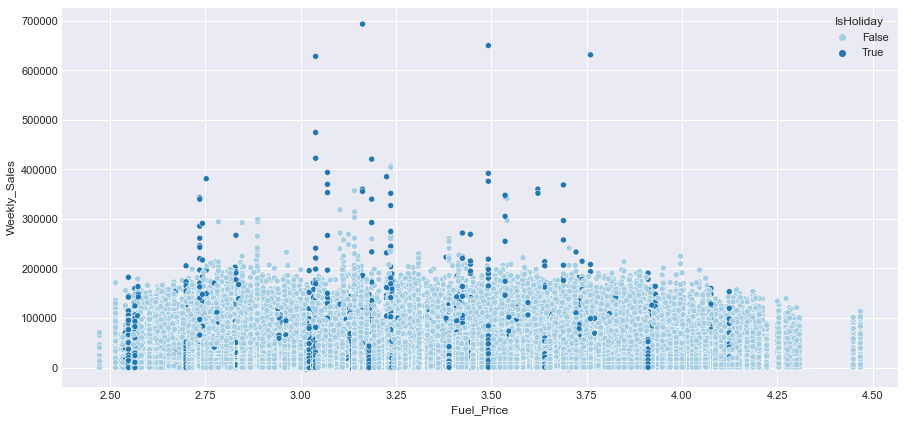

In [170]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.scatterplot ( data = train_df, x = 'Fuel_Price', y =  'Weekly_Sales', hue = 'IsHoliday');

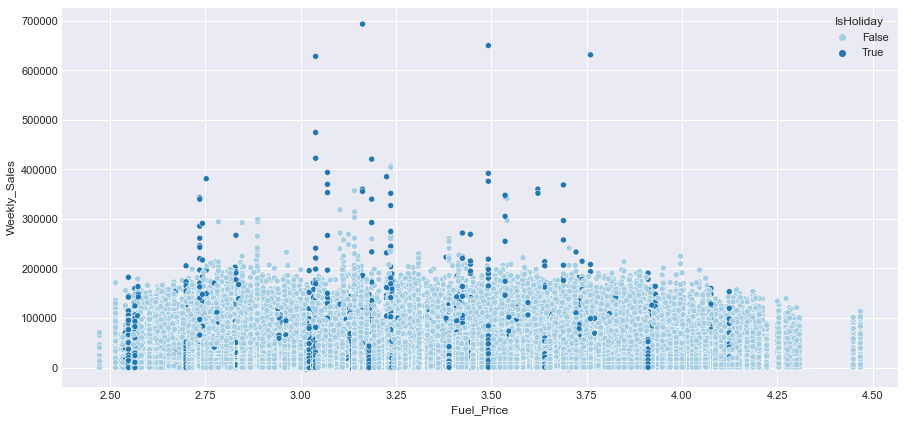

In [171]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.scatterplot ( data = train_df, x = 'Fuel_Price', y =  'Weekly_Sales', hue = 'IsHoliday');

# 2.3.4 Contrast between Weekly Sales and CPI
The CPI does not appear to be a determining factor affecting weekly sales.


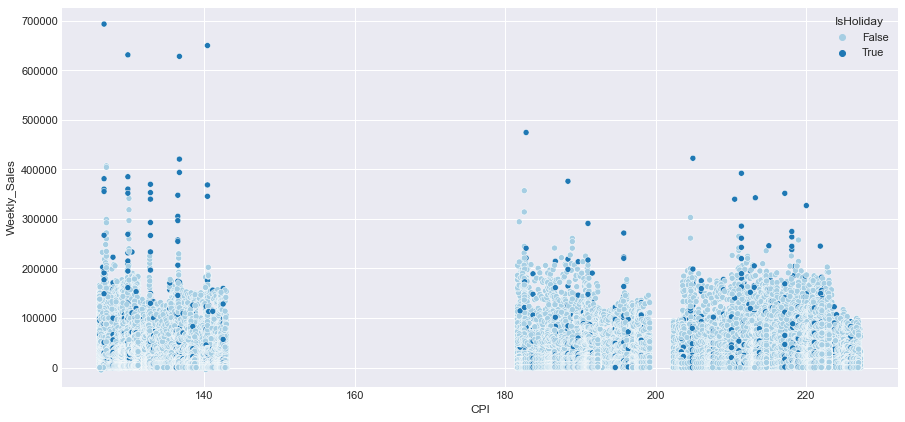

In [172]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'CPI', y =  'Weekly_Sales', hue = 'IsHoliday');

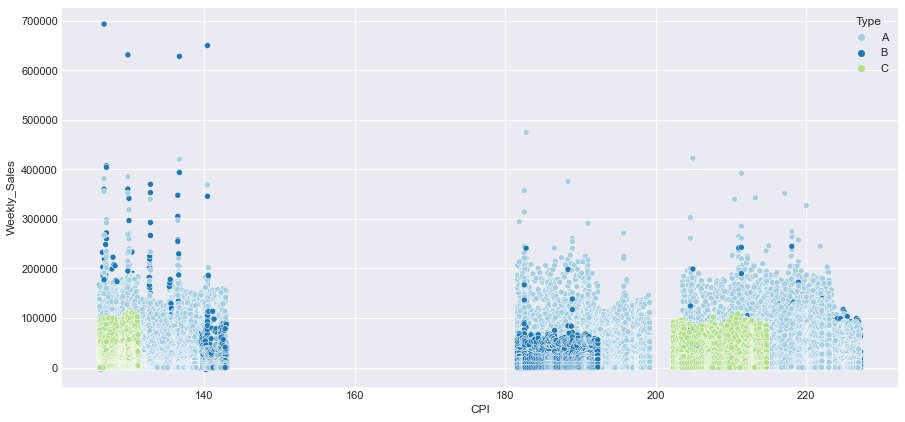

In [173]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'CPI', y =  'Weekly_Sales', hue = 'Type' );

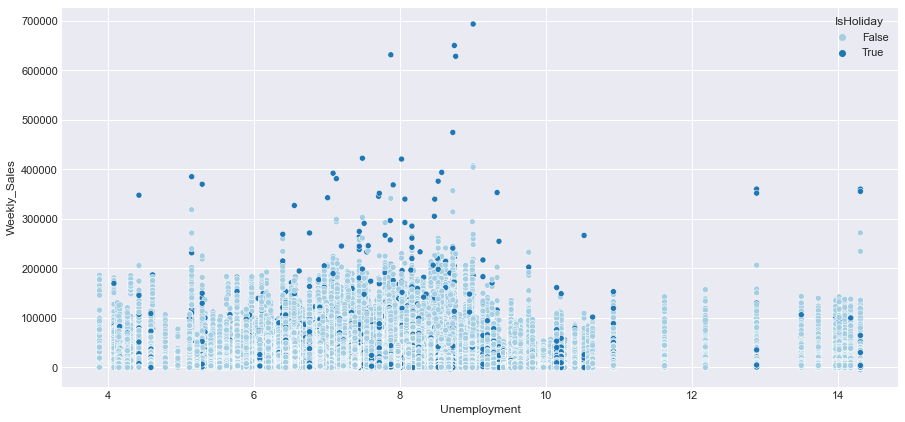

In [174]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Unemployment', y =  'Weekly_Sales', hue = 'IsHoliday' );

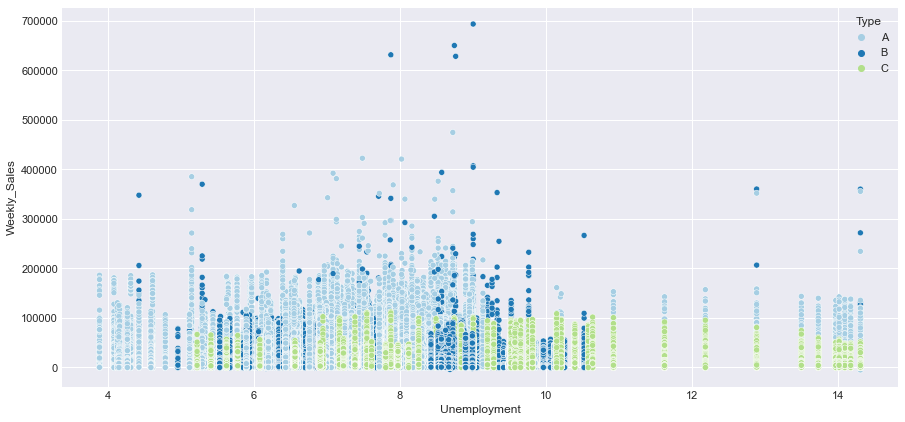

In [175]:
plt.figure (figsize = (15,7))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Unemployment', y =  'Weekly_Sales', hue = 'Type' );

# Markdown1 and Markdown4 sales are synchronized to increase sales in the month of January and therefore a correlation of 82% 
is observed

In [ ]:
# sns.set(style="white")

corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

plt.show()

In [177]:
weekly_sales_corr = train_df.corr().iloc[2,:]


In [178]:
corr_df = pd.DataFrame(data = weekly_sales_corr, index = weekly_sales_corr.index ).sort_values (by = 'Weekly_Sales', ascending = False)

# 2.4.2 Correlation table of the different variables vs Weekly Sales
The variables that are most important in weekly sales are the sales area of the store, the department and the different sales.

The store format, unemployment and the CPI seem to have a slight negative effect on sales when these variables increase in
value.


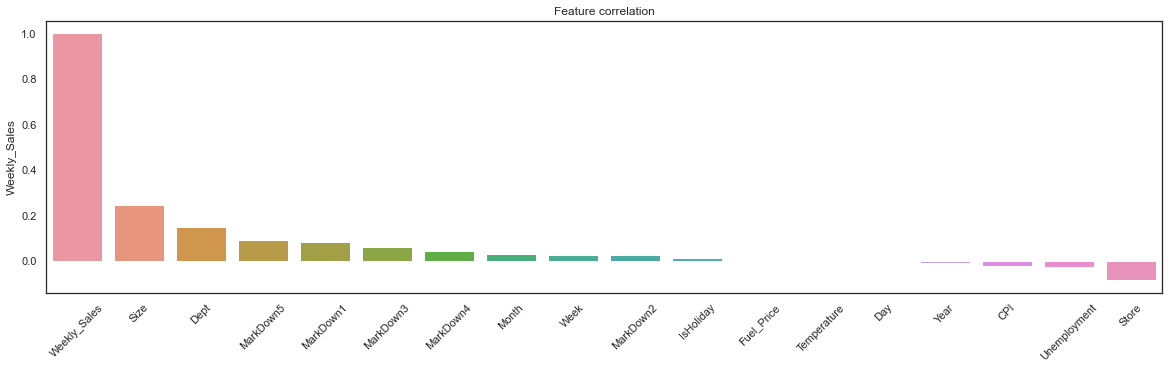

In [179]:
plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Weekly_Sales');

# Feature engineering

In [180]:
data_train = train_df.copy()
data_test = test_df.copy()

In [181]:
data_train['SuperBowlWeek'] = train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_train['LaborDay'] = train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_train['Thanksgiving'] = train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_train['Christmas'] = train_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [182]:
data_test['SuperBowlWeek'] = test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
data_test['LaborDay'] = test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
data_test['Thanksgiving'] = test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
data_test['Christmas'] = test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [183]:
data_train.insert(24,'Quarter',data_train['Week'])
data_test.insert(23,'Quarter',data_test['Week'])

In [184]:
data_train['Quarter'] = data_train['Quarter'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13], 1)
data_train['Quarter'] = data_train['Quarter'].replace([14,15,16,17,18,19,20,21,22,23,24,25,26], 2)
data_train['Quarter'] = data_train['Quarter'].replace([27,28,29,30,31,32,33,34,35,36,37,38,39], 3)
data_train['Quarter'] = data_train['Quarter'].replace([40,41,42,43,44,45,46,47,48,49,50,51,52], 4)

data_test['Quarter'] = data_train['Quarter'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13], 1)
data_test['Quarter'] = data_train['Quarter'].replace([14,15,16,17,18,19,20,21,22,23,24,25,26], 2)
data_test['Quarter'] = data_train['Quarter'].replace([27,28,29,30,31,32,33,34,35,36,37,38,39], 3)
data_test['Quarter'] = data_train['Quarter'].replace([40,41,42,43,44,45,46,47,48,49,50,51,52], 4)

In [185]:
data_train['MarkdownsSum'] = train_df['MarkDown1'] + train_df['MarkDown2'] + train_df['MarkDown3'] + train_df['MarkDown4'] + train_df['MarkDown5']
data_test['MarkdownsSum'] = test_df['MarkDown1'] + test_df['MarkDown2'] + test_df['MarkDown3'] + test_df['MarkDown4'] + test_df['MarkDown5']

<AxesSubplot:>

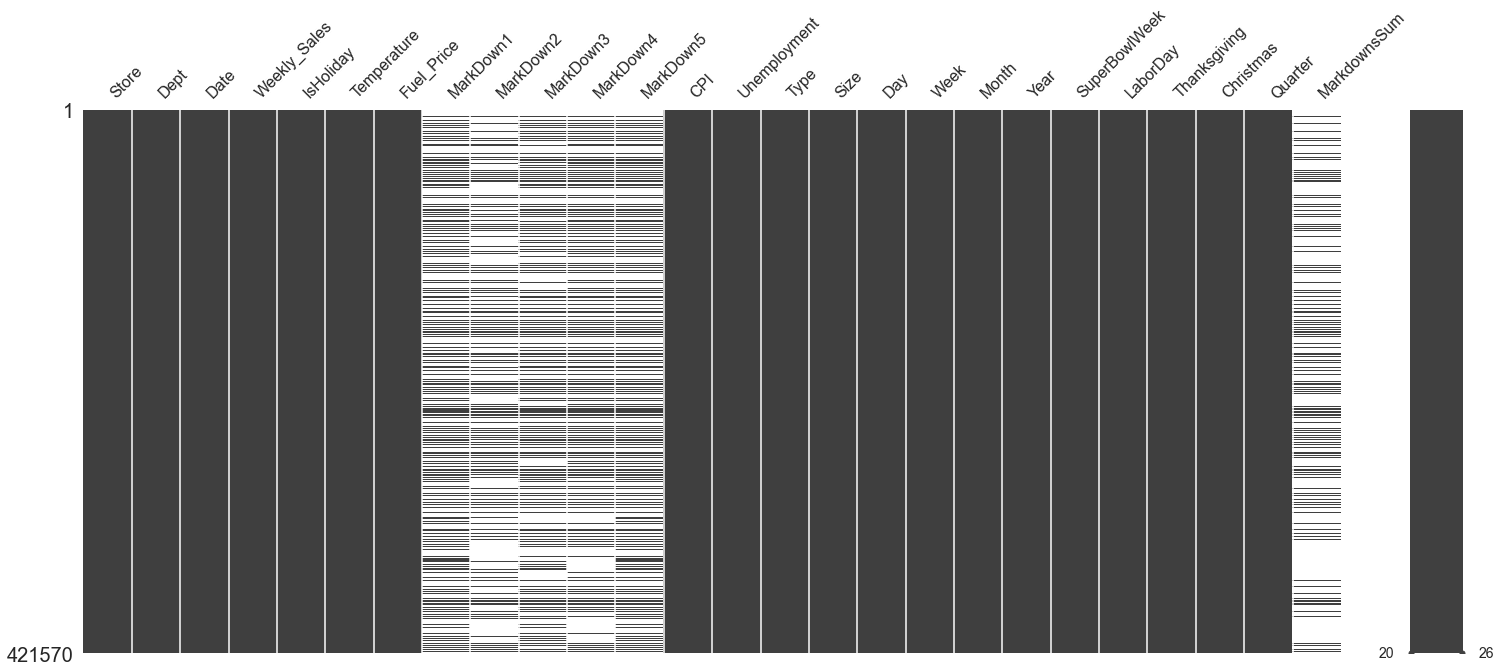

In [186]:
import missingno as msno
msno.matrix(data_train)

<AxesSubplot:>

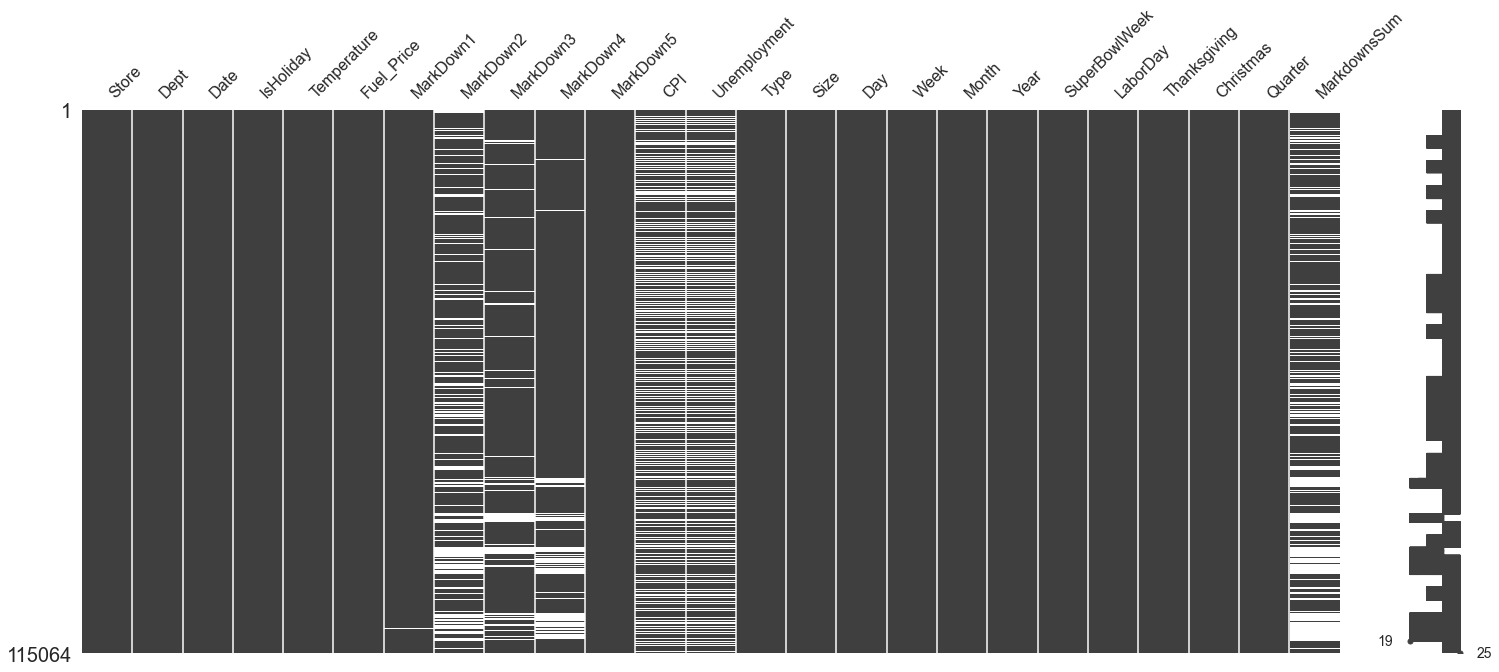

In [187]:
msno.matrix(data_test)

In [188]:
# Sumatorio de valores missing para el dataset 'train'.
print('Missing data in data_train')
print('---------------------')
print(data_train.isna().sum())
print('')
print('Missing data in data_test')
print('---------------------')
print(data_test.isna().sum())

Missing data in data_train
---------------------
Store                 0
Dept                  0
Date                  0
Weekly_Sales          0
IsHoliday             0
Temperature           0
Fuel_Price            0
MarkDown1        270889
MarkDown2        310322
MarkDown3        284479
MarkDown4        286603
MarkDown5        270138
CPI                   0
Unemployment          0
Type                  0
Size                  0
Day                   0
Week                  0
Month                 0
Year                  0
SuperBowlWeek         0
LaborDay              0
Thanksgiving          0
Christmas             0
Quarter               0
MarkdownsSum     324514
dtype: int64

Missing data in data_test
---------------------
Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1          149
MarkDown2        28627
MarkDown3         9829
MarkDown4        12888
MarkDown5            0
CPI         

In [189]:
data_train.fillna(0, inplace = True)

In [190]:
data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)

In [191]:
# Los valores missing en 'test' que corresponden solamente a las rebajas los rellenamos con "0"
data_test.fillna(0, inplace = True)

In [192]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [193]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

In [194]:
data_train.corr()['Weekly_Sales'][:5].sort_values(ascending = False)

Weekly_Sales    1.000000
Dept            0.148032
IsHoliday       0.012774
Temperature    -0.002312
Store          -0.085195
Name: Weekly_Sales, dtype: float64

In [195]:
X_f = data_train.drop(['Date','Weekly_Sales'], axis = 'columns' )
y_f = data_train['Weekly_Sales']


In [196]:
from sklearn.ensemble import RandomForestRegressor
rf_features = RandomForestRegressor() 

In [197]:
%%time
rf_features.fit(X_f, y_f)

Wall time: 6min 34s


RandomForestRegressor()

In [198]:
importance_df = pd.DataFrame({
    'feature': X_f.columns,
    'importance': rf_features.feature_importances_
}).sort_values('importance', ascending=False)

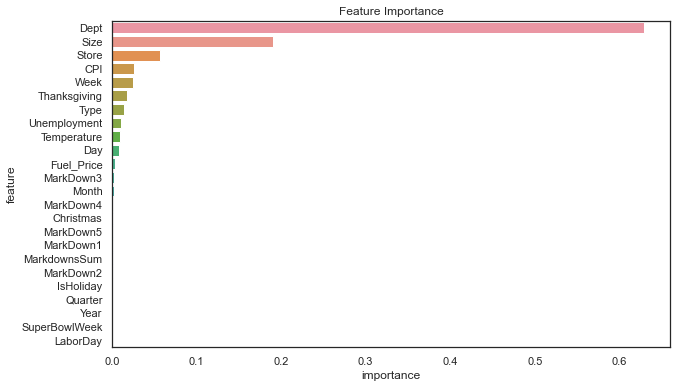

In [199]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(26), x='importance', y='feature');

In [200]:
from sklearn.linear_model import LinearRegression

dt_vif = data_train.copy(deep = True)
features = list(dt_vif.columns)
features.remove('Weekly_Sales') # Clear target variable
features.remove('Date') # A variable in Date format cannot be processed by the function.
dt_vif = dt_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dt_vif[fet]
    y = data_train[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('The VIF value for the variable', var, 'is:', vif)

The VIF value for the variable Store is: 1.1336701287245838
The VIF value for the variable Dept is: 1.000681989948741
The VIF value for the variable IsHoliday is: inf
The VIF value for the variable Temperature is: 1.4717122609638456
The VIF value for the variable Fuel_Price is: 4.3956989935954205
The VIF value for the variable MarkDown1 is: 5.615731709778244
The VIF value for the variable MarkDown2 is: 3.0910051794053515
The VIF value for the variable MarkDown3 is: 3.1127015420829847
The VIF value for the variable MarkDown4 is: 5.0114863285100855
The VIF value for the variable MarkDown5 is: 1.989953886749045
The VIF value for the variable CPI is: 1.370489541644535
The VIF value for the variable Unemployment is: 1.3363232678083228
The VIF value for the variable Type is: 3.06552940102421
The VIF value for the variable Size is: 3.0757042038634768
The VIF value for the variable Day is: 316.7399612339912
The VIF value for the variable Week is: 40090.19630832094
The VIF value for the variabl

In [201]:
dt_vif = data_train.copy(deep = True)
features = list(dt_vif.columns)
features.remove('Weekly_Sales')
features.remove('Date')
features.remove('MarkdownsSum') # Eliminamos esta variable por ser la que posee mas VIF del conjunto Markdown
features.remove('Week') # Eliminamos la variable Week por tener un VIF de 40,090
dt_vif = dt_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dt_vif[fet]
    y = data_train[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('The VIF value for the variable', var, 'is:', vif)

The VIF value for the variable Store is: 1.1331534787389632
The VIF value for the variable Dept is: 1.0006803291723476
The VIF value for the variable IsHoliday is: inf
The VIF value for the variable Temperature is: 1.3340642862399763
The VIF value for the variable Fuel_Price is: 3.542440533059125
The VIF value for the variable MarkDown1 is: 4.5424889488949205
The VIF value for the variable MarkDown2 is: 1.4347195396978187
The VIF value for the variable MarkDown3 is: 1.6242987752000844
The VIF value for the variable MarkDown4 is: 3.6111652842737114
The VIF value for the variable MarkDown5 is: 1.4041504595481529
The VIF value for the variable CPI is: 1.358126046652642
The VIF value for the variable Unemployment is: 1.3097908015767514
The VIF value for the variable Type is: 3.063401612858368
The VIF value for the variable Size is: 3.075653347671869
The VIF value for the variable Day is: 1.1953883515507082
The VIF value for the variable Month is: 16.449355315332717
The VIF value for the va

In [202]:
dt_vif = data_train.copy(deep = True)
features = list(dt_vif.columns)
features.remove('Weekly_Sales')
features.remove('Date')
features.remove('MarkdownsSum') 
features.remove('Week') 
features.remove('Quarter') # Esta variable es la siguientye candidata por tener un VIF de 15


dt_vif = dt_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dt_vif[fet]
    y = data_train[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('The VIF value for the variable', var, 'is:', vif)


The VIF value for the variable Store is: 1.1331500770327947
The VIF value for the variable Dept is: 1.0006802367771321
The VIF value for the variable IsHoliday is: inf
The VIF value for the variable Temperature is: 1.3339611270928566
The VIF value for the variable Fuel_Price is: 3.525971425075579
The VIF value for the variable MarkDown1 is: 4.505646448599765
The VIF value for the variable MarkDown2 is: 1.4256453022952091
The VIF value for the variable MarkDown3 is: 1.6241306448862458
The VIF value for the variable MarkDown4 is: 3.596011643505132
The VIF value for the variable MarkDown5 is: 1.4004798561245047
The VIF value for the variable CPI is: 1.3571734350536033
The VIF value for the variable Unemployment is: 1.309779841855654
The VIF value for the variable Type is: 3.0633826070373136
The VIF value for the variable Size is: 3.0750468881093216
The VIF value for the variable Day is: 1.1324964695084587
The VIF value for the variable Month is: 1.3940924558324634
The VIF value for the va

In [203]:
dt_vif = data_train.copy(deep = True)
features = list(dt_vif.columns)
features.remove('Weekly_Sales')
features.remove('Date')
features.remove('MarkdownsSum') 
features.remove('Week') 
features.remove('Quarter') 
features.remove('IsHoliday') # Eliminamos IsHoliday por tener valor Inf.


dt_vif = dt_vif[features]

for i in range(len(features)):
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = dt_vif[fet]
    y = data_train[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('The VIF value for the variable', var, 'is:', vif)


The VIF value for the variable Store is: 1.1331500770327951
The VIF value for the variable Dept is: 1.0006802367771326
The VIF value for the variable Temperature is: 1.3339611270928564
The VIF value for the variable Fuel_Price is: 3.5259714250755763
The VIF value for the variable MarkDown1 is: 4.505646448599765
The VIF value for the variable MarkDown2 is: 1.4256453022952082
The VIF value for the variable MarkDown3 is: 1.6241306448862463
The VIF value for the variable MarkDown4 is: 3.5960116435051335
The VIF value for the variable MarkDown5 is: 1.400479856124505
The VIF value for the variable CPI is: 1.3571734350536038
The VIF value for the variable Unemployment is: 1.3097798418556537
The VIF value for the variable Type is: 3.0633826070373136
The VIF value for the variable Size is: 3.0750468881093216
The VIF value for the variable Day is: 1.1324964695084583
The VIF value for the variable Month is: 1.3940924558324637
The VIF value for the variable Year is: 4.8136301568508495
The VIF valu

# ML

In [204]:
data_train.drop(['MarkdownsSum', 'Week','Quarter','IsHoliday','Date'], axis = 'columns', inplace=True)
data_test.drop(['MarkdownsSum', 'Week','Quarter','IsHoliday','Date'], axis = 'columns', inplace=True)

In [205]:
print(data_train.columns)
print('---------------------------------------------------------------------------')
print(data_test.columns)

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek',
       'LaborDay', 'Thanksgiving', 'Christmas'],
      dtype='object')
---------------------------------------------------------------------------
Index(['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas'],
      dtype='object')


In [206]:
X = data_train[['Store', 'Dept','Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek',
       'LaborDay', 'Thanksgiving', 'Christmas']]

y = data_train['Weekly_Sales']

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LinearRegression

In [208]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# We create a linear regression model
lrModel = lr.fit(X_train, y_train) 

# Prediccion para Train
preds_train_LR = lrModel.predict(X_train) 
# Prediccion para Test
preds_test_LR = lrModel.predict(X_test) 

print('Medium R2 for Train is : ',metrics.mean_squared_error(y_train, preds_train_LR, squared = False)) # Obtenemos el R2 medio para Train
print('Medium R2 for test is : ',metrics.mean_squared_error(y_test, preds_test_LR , squared = False)) #Obtenemos el R2 medio para Test

Medium R2 for Train is :  21730.271130404682
Medium R2 for test is :  21586.411567839554


In [209]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]

predict_LR = lrModel.predict(test)

In [210]:
sampleSubmission['Weekly_Sales'] = predict_LR
sampleSubmission.to_csv('submission_LR.csv',index=False)

In [211]:
sampleSubmission.head()

Id  Weekly_Sales
0  1_1_2012-11-02  17411.689151
1  1_1_2012-11-09  17926.310972
2  1_1_2012-11-16  17061.972694
3  1_1_2012-11-23  25235.254776
4  1_1_2012-11-30  16799.620360

# GradientBoostingRegressor

In [212]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

# We create Gradient Boosting Regressor model
gbModel = gb.fit(X_train, y_train)

# Prediction for Train
preds_train_GBR = gbModel.predict(X_train)
# Prediction for Test
preds_test_GBR = gbModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is: ',metrics.mean_squared_error(y_train, preds_train_GBR, squared = False))
# We obtain the mean R2 for Test
print('Medium R2 for Test is : ',metrics.mean_squared_error(y_test, preds_test_GBR, squared = False))

Medium R2 for Train is:  11429.853735314195
Medium R2 for Test is :  11391.809007642669


In [213]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_GBR = gb.predict(test)

In [214]:
sampleSubmission['Weekly_Sales'] = predict_GBR
sampleSubmission.to_csv('submission_GBR.csv',index=False)

In [215]:
sampleSubmission.head()

Id  Weekly_Sales
0  1_1_2012-11-02  22857.534951
1  1_1_2012-11-09  22857.534951
2  1_1_2012-11-16  22737.986541
3  1_1_2012-11-23  30980.980649
4  1_1_2012-11-30  29814.751112

# XGBRegressor

In [216]:
from xgboost import XGBRegressor

gbm = XGBRegressor(random_state=42, n_jobs=-1)

# We create Gradient Boosting Regressor model
gbmModel = gbm.fit(X_train, y_train)

# Prediction for Train
preds_train_XGB = gbmModel.predict(X_train)
# Prediction for Test
preds_test_XGB = gbmModel.predict(X_test)

# We get the mean R2 for Train
print('R2 mean for Train is : ',metrics.mean_squared_error(y_train, preds_train_XGB, squared = False))
# We obtain the mean R2 for Test
print('R2 mean for Test is : ',metrics.mean_squared_error(y_test, preds_test_XGB, squared = False))

R2 mean for Train is :  5082.261762297623
R2 mean for Test is :  5365.436270322845


In [217]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_XGB = gbm.predict(test)

In [218]:
sampleSubmission['Weekly_Sales'] = predict_XGB
sampleSubmission.to_csv('submission_XGB.csv',index=False)

In [219]:
sampleSubmission.head()

Id  Weekly_Sales
0  1_1_2012-11-02  21591.820312
1  1_1_2012-11-09  22083.630859
2  1_1_2012-11-16  22535.039062
3  1_1_2012-11-23  25380.460938
4  1_1_2012-11-30  21108.103516

# RandomForestRegressor

In [220]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is: ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We get the mean R2 for Test
print('Medium R2 for Test is : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is:  1369.1191775993675
Medium R2 for Test is :  3442.3942552320946


In [221]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR = rf.predict(test)

In [222]:
sampleSubmission['Weekly_Sales'] = predict_RFR
sampleSubmission.to_csv('submission_RFR.csv',index=False)

In [223]:
sampleSubmission.head()

Id  Weekly_Sales
0  1_1_2012-11-02    36947.7531
1  1_1_2012-11-09    21326.2966
2  1_1_2012-11-16    19623.2217
3  1_1_2012-11-23    23105.3870
4  1_1_2012-11-30    32787.1343

In [224]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None,random_state=42,bootstrap=False)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('R2 mean for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We get the mean R2 for Test
print('R2 mean for Test is : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 mean for Train is :  3.898443838131001e-11
R2 mean for Test is :  4395.898460579069


In [225]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Mean R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We get the mean R2 for Train
print('R2 mean for Test is: ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Mean R2 for Train is :  1371.5301477586631
R2 mean for Test is:  3439.186887921579
Wall time: 4min 49s


In [226]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42,max_features=15)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We obtain the mean R2 for Test
print('R2 mean for Test is : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is :  1405.1166817343587
R2 mean for Test is :  3538.2129928046447
Wall time: 3min 36s


In [227]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42,max_features=15,n_jobs=-1 )

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We get the mean R2 for Test
print('R2 mean for Test is : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is :  1405.1166817343587
R2 mean for Test is :  3538.2129928046447
Wall time: 44.6 s


In [228]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80 ,max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is: ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We obtain the mean R2 for Test
print('R2 mean for Test is: ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is:  1418.0515984905808
R2 mean for Test is:  3542.2672865656186
Wall time: 33.9 s


In [229]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned = rf.predict(test)


In [230]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned
sampleSubmission.to_csv('submission_RFR_Tunned.csv',index=False)

In [231]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80 ,min_samples_split = 4, max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We obtain the mean R2 for Test
print('R2 mean for Test is : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is :  1711.1491832712115
R2 mean for Test is :  3525.6607565107633
Wall time: 31.7 s


In [232]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned2 = rf.predict(test)

In [233]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned2
sampleSubmission.to_csv('submission_RFR_Tunned2.csv',index=False)

In [234]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80,min_samples_leaf= 2, max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#We create Random Forest Regressor model
rfModel = rf.fit(X_train, y_train)

# Prediction for Train
preds_train_RFR = rfModel.predict(X_train)
# Prediction for Test
preds_test_RFR = rfModel.predict(X_test)

# We get the mean R2 for Train
print('Medium R2 for Train is: ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# We get the mean R2 for Test
print('R2 mean for Test is: ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

Medium R2 for Train is:  2013.3786274307495
R2 mean for Test is:  3593.399651325552
Wall time: 30.7 s


In [235]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned3 = rf.predict(test)

In [236]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned3
sampleSubmission.to_csv('submission_RFR_Tunned3.csv',index=False)